# **Lab 6 - Decision Trees**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


# **Exploratory Data Analysis**





In [ ]:
# view dimensions of dataset

df.shape

(34562, 12)

# **Dataset Preprocessing**



In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
missing_values

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
1117,1117,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
1360,1360,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E
1776,1776,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
10718,10718,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
12348,12348,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
df = df.fillna(df.mean())

<ipython-input-8-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df[pd.isnull(df).any(axis=1)]

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source


In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])


In [ ]:
df.head(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1,74,3,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1,74,3,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1,74,3,1.0,1.0,13.0,0
5,0.100778,0.238095,63.0,381,0,74,3,3.0,1.0,15.0,0
6,15.326789,0.684211,19.0,17473,1,74,3,1.0,1.0,13.0,0
7,0.401190,0.134111,343.0,8257,1,74,3,2.0,1.0,46.0,0
8,15.913862,0.077586,11.6,110761,1,40,1,57.0,10.0,9.0,0
9,0.005437,0.250000,2.0,3,3,55,1,4.0,4.0,2.0,0


In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34562 entries, 0 to 34561
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  34562 non-null  float64
 1   api_access_uniqueness           34562 non-null  float64
 2   sequence_length(count)          34562 non-null  float64
 3   vsession_duration(min)          34562 non-null  int64  
 4   ip_type                         34562 non-null  int64  
 5   behavior                        34562 non-null  int64  
 6   behavior_type                   34562 non-null  int64  
 7   num_sessions                    34562 non-null  float64
 8   num_users                       34562 non-null  float64
 9   num_unique_apis                 34562 non-null  float64
 10  source                          34562 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.9 MB


In [ ]:
df['source'].value_counts()

0    17918
1    16644
Name: source, dtype: int64

# **Preparing dataset to be fed into Model**



In [ ]:
X = df.drop(['source'], axis=1)

y = df['source']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24193, 10)
(24193,)
(10369, 10)
(10369,)


In [ ]:
X_train.head(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis
10951,0.241652,0.695652,23.0,334,1,74,3,1.0,1.0,16.0
6241,17.372367,0.191011,267.0,278306,1,74,3,1.0,1.0,51.0
23682,7.762000,0.857143,7.0,3261,1,74,3,1.0,1.0,6.0
17423,4.238713,0.087963,216.0,54934,1,74,3,1.0,1.0,19.0
29557,2.520333,1.000000,3.0,454,0,74,3,1.0,1.0,3.0
454,0.451778,0.777778,9.0,244,1,74,3,1.0,1.0,7.0
9892,0.819547,0.232044,181.0,8901,1,74,3,1.0,1.0,42.0
4122,2.558129,0.100000,190.0,29163,1,74,3,1.0,1.0,19.0
7585,5.594500,0.500000,4.0,1343,1,74,3,1.0,1.0,2.0
31840,44.734400,0.800000,5.0,13421,1,74,3,1.0,1.0,4.0


# **Decision Tree - CART**



## **Measures for selecting the Best Split**



In [ ]:
# Find more about scikit-learn's implementation of decision trees here - https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier

In [ ]:
df[pd.isnull(df).any(axis=1)]

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source


In [ ]:
# setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
clf_gini = DecisionTreeClassifier(max_depth=4, random_state=42)#node 2^7

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Getting some predictions from the testing set
y_pred_gini = clf_gini.predict(X_test)

y_pred_gini

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# Finding the testing accuracy of the model
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Test accuracy score with criterion gini index: 0.8072


In [ ]:
# Finding the training accuracy of the model
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8029


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8029
Test set score: 0.8072


[Text(0.47115384615384615, 0.9, 'x[5] <= 58.5\ngini = 0.499\nsamples = 24193\nvalue = [12572, 11621]'),
 Text(0.25, 0.7, 'x[5] <= 57.0\ngini = 0.144\nsamples = 6869\nvalue = [538, 6331]'),
 Text(0.15384615384615385, 0.5, 'x[5] <= 29.5\ngini = 0.221\nsamples = 615\nvalue = [537, 78]'),
 Text(0.07692307692307693, 0.3, 'x[5] <= 0.5\ngini = 0.444\nsamples = 102\nvalue = [34, 68]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.386\nsamples = 46\nvalue = [34, 12]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.23076923076923078, 0.3, 'x[2] <= 118.5\ngini = 0.038\nsamples = 513\nvalue = [503, 10]'),
 Text(0.19230769230769232, 0.1, 'gini = 0.012\nsamples = 496\nvalue = [493, 3]'),
 Text(0.2692307692307692, 0.1, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.34615384615384615, 0.5, 'x[9] <= 109.0\ngini = 0.0\nsamples = 6254\nvalue = [1, 6253]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 6253\nvalue = [0, 6253]'),
 Text(0.38461538461538

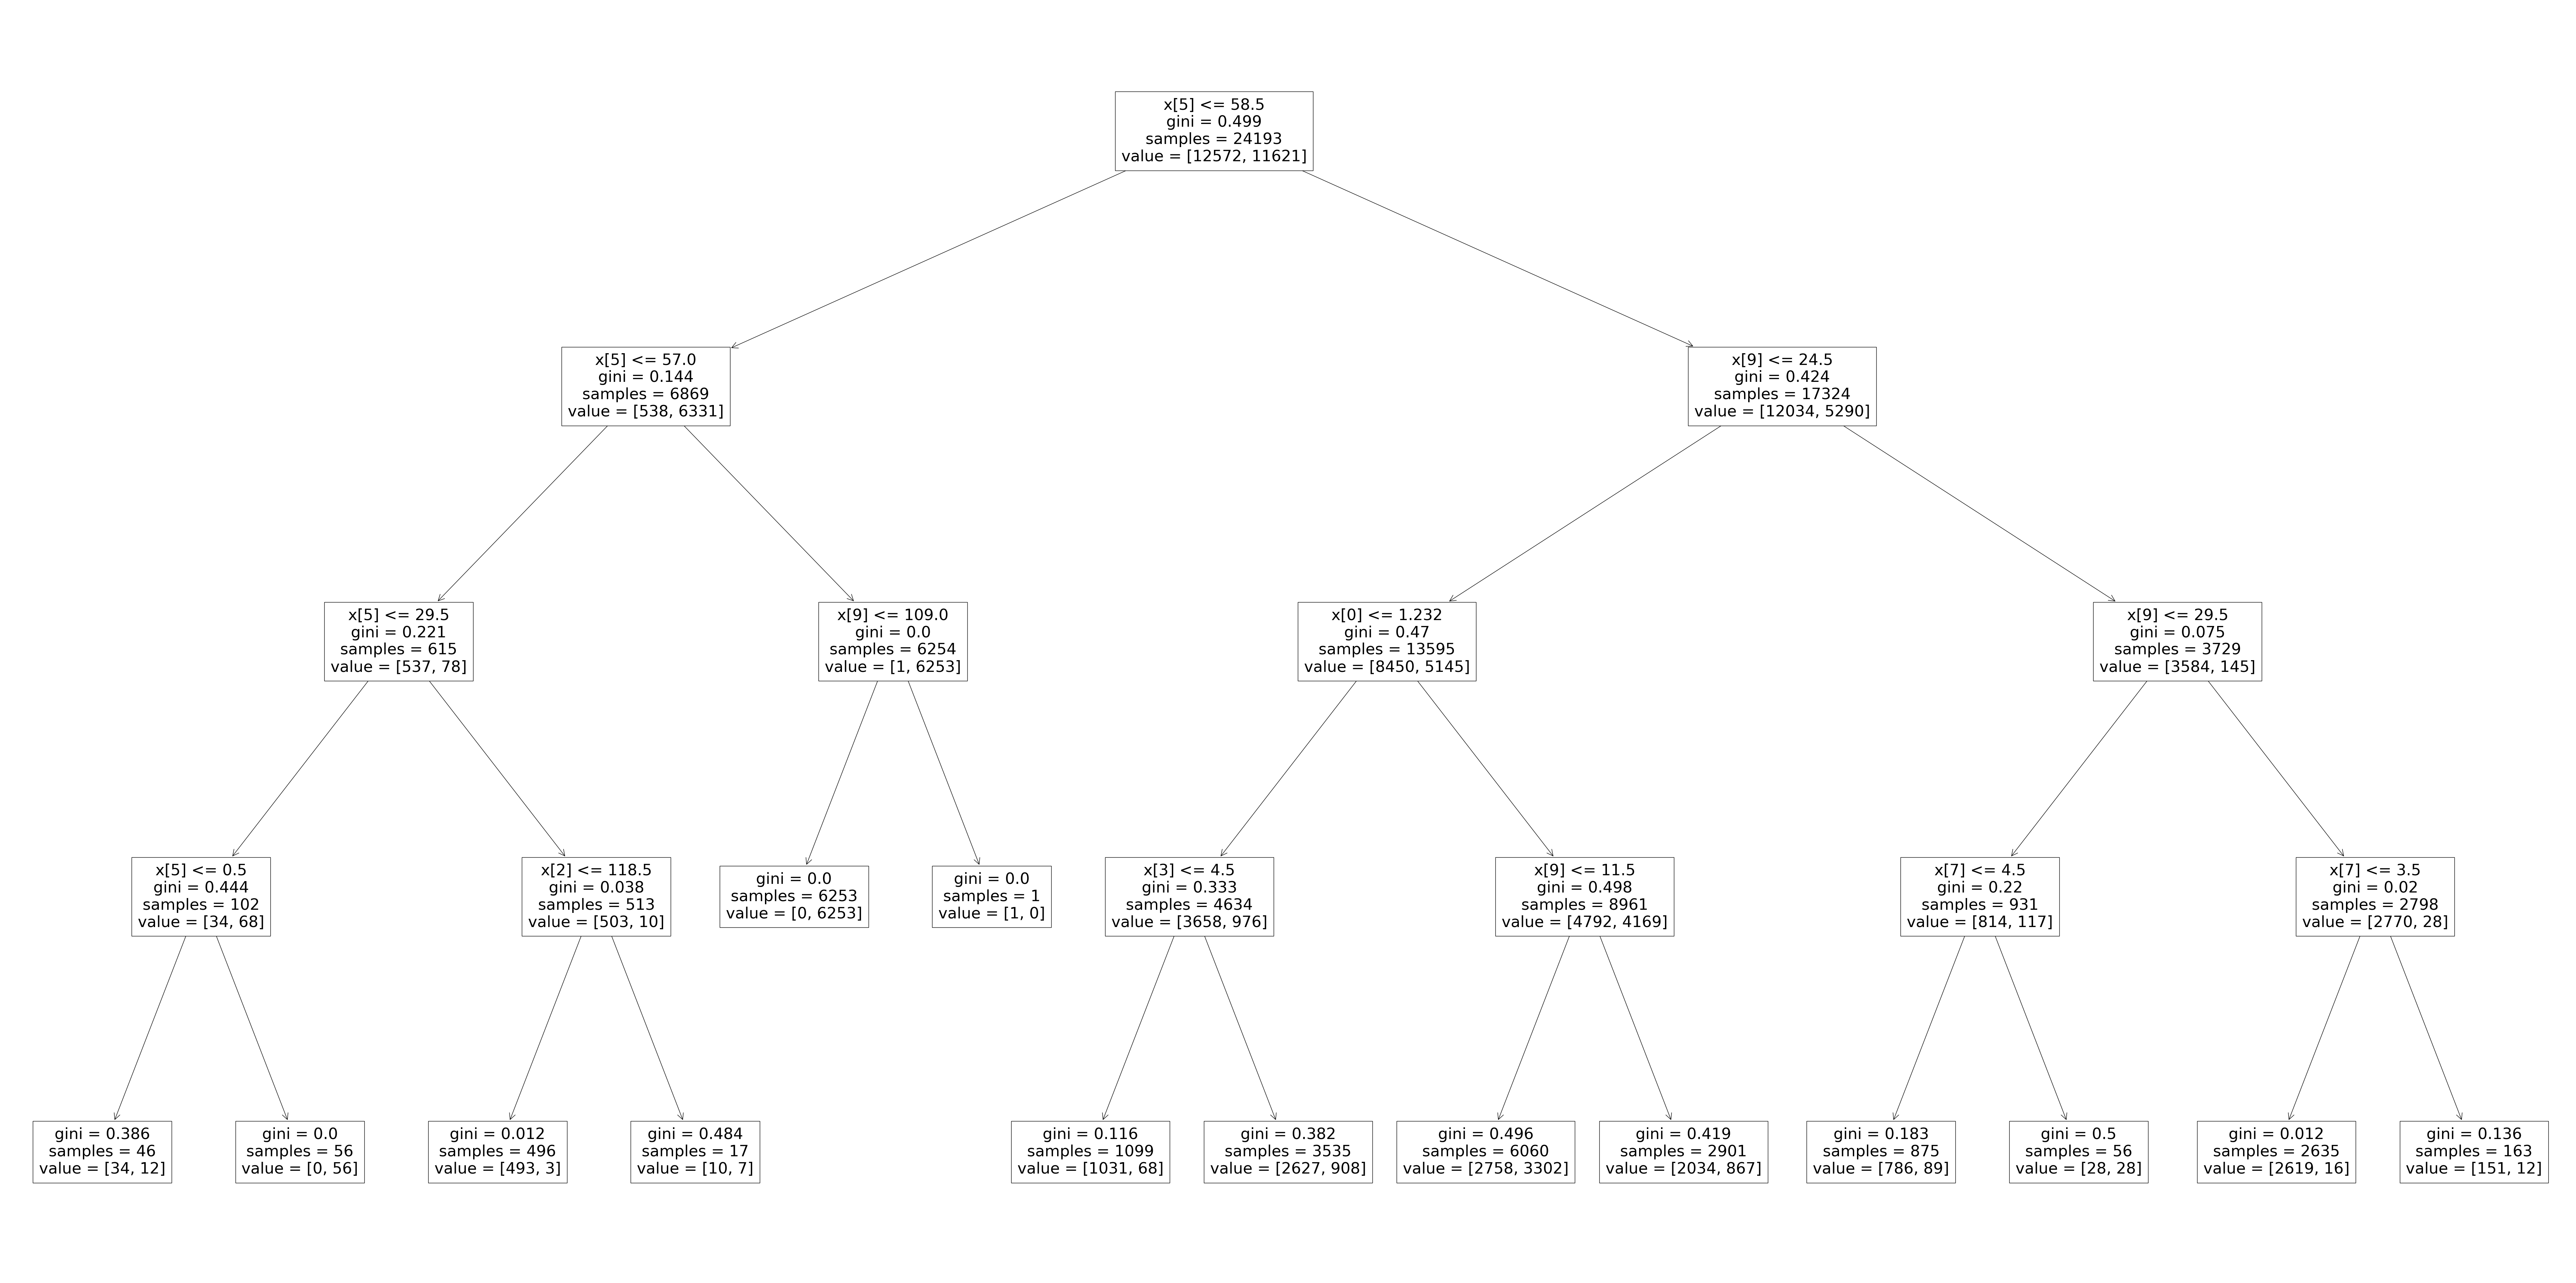

In [ ]:
# plotting the splits
import matplotlib.pyplot as plt

plt.figure(figsize=(96,48))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
# Save the figure for future reference
#graph.render(filename='arman',directory='/content/drive/MyDrive/colab datasets')

# **Evaluating the Model - CART**





##**Confusion Matrix**


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4231 1115]
 [ 884 4139]]


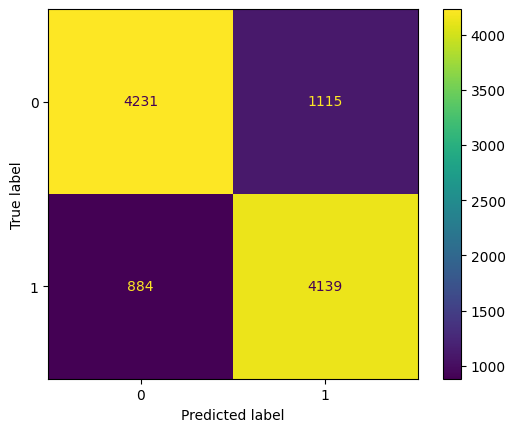

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot()
#plt.savefig('/content/drive/MyDrive/colab datasets')

## **Support and Confidence**


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      5346
           1       0.79      0.82      0.81      5023

    accuracy                           0.81     10369
   macro avg       0.81      0.81      0.81     10369
weighted avg       0.81      0.81      0.81     10369



# **Decision Tree - C4.5**

In [ ]:
# setting maximum depth of the decision tree to be level 3 with randomly chosen samples in the training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
# Getting some predictions from the testing set
y_pred_en = clf_en.predict(X_test)
y_pred_en

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
# Getting some predictions from the training set
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8057


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8057
Test set score: 0.8087


[Text(0.43902439024390244, 0.9166666666666666, 'x[5] <= 58.5\nentropy = 0.999\nsamples = 24193\nvalue = [12572, 11621]'),
 Text(0.20121951219512196, 0.75, 'x[5] <= 57.0\nentropy = 0.396\nsamples = 6869\nvalue = [538, 6331]'),
 Text(0.13414634146341464, 0.5833333333333334, 'x[5] <= 29.5\nentropy = 0.549\nsamples = 615\nvalue = [537, 78]'),
 Text(0.07317073170731707, 0.4166666666666667, 'x[5] <= 0.5\nentropy = 0.918\nsamples = 102\nvalue = [34, 68]'),
 Text(0.04878048780487805, 0.25, 'x[9] <= 1.5\nentropy = 0.828\nsamples = 46\nvalue = [34, 12]'),
 Text(0.024390243902439025, 0.08333333333333333, 'entropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(0.07317073170731707, 0.08333333333333333, 'entropy = 0.201\nsamples = 32\nvalue = [31, 1]'),
 Text(0.0975609756097561, 0.25, 'entropy = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.1951219512195122, 0.4166666666666667, 'x[2] <= 118.5\nentropy = 0.139\nsamples = 513\nvalue = [503, 10]'),
 Text(0.14634146341463414, 0.25, 'x[7] <= 1.5\nentropy

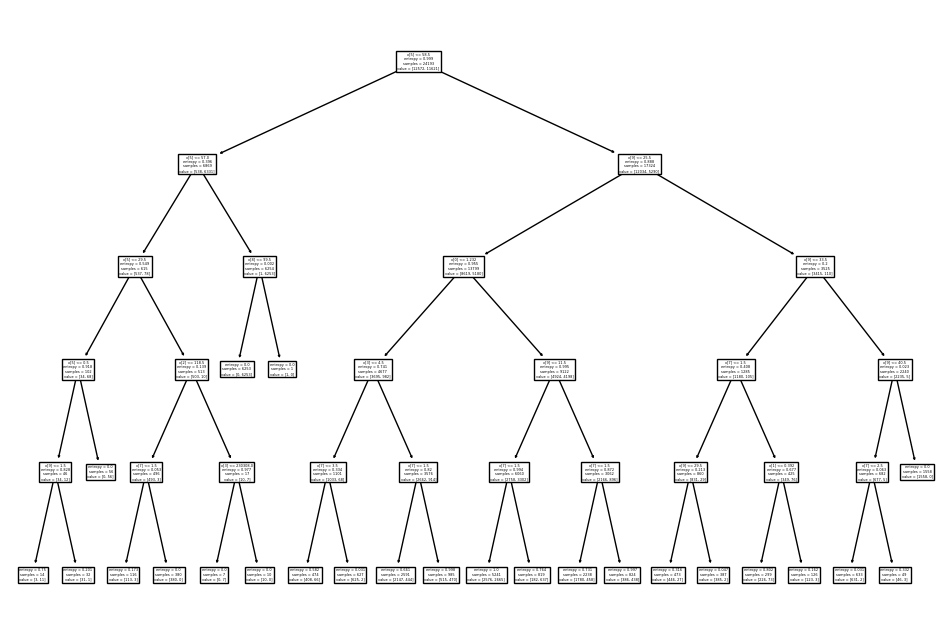

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

KeyError: ignored

In [ ]:
# Save the figure for future reference
#graph.render(filename='C4.5.dot',directory='/content/drive/MyDrive/CSI 382 - Datasets/')

# **Evaluating the model - C4.5**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4074 1272]
 [ 712 4311]]


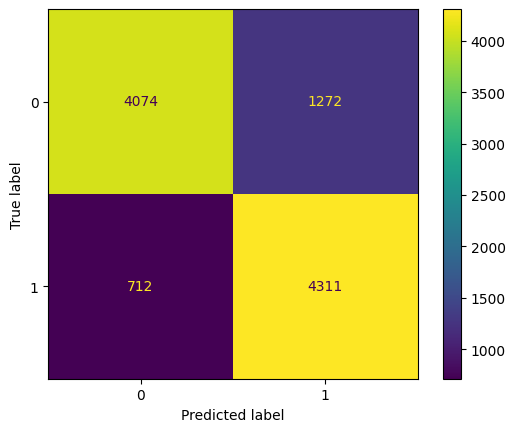

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_en.classes_)
disp.plot()
#plt.savefig('/content/drive/MyDrive/colab datasets')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      5346
           1       0.77      0.86      0.81      5023

    accuracy                           0.81     10369
   macro avg       0.81      0.81      0.81     10369
weighted avg       0.81      0.81      0.81     10369

